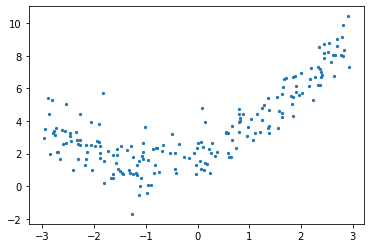

In [58]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
data = genfromtxt('mydata.csv', delimiter=',')
X,y=np.split(data,2,axis=1)
X=X.flatten()
y=y.flatten()
plt.scatter(X, y, s = 5)

In [59]:
x_tr, y_tr = np.array(X[:175]), np.array(y[:175])
x_val, y_val = np.array(X[175:]), np.array(y[175:])

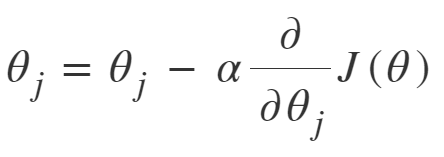

$J(W)= \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^i-y^i)x^i_j$

In [66]:
errors = []
w1_grad = []
w2_grad = []

num_epoch=5000
learning_rate=0.1

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    
    y_hat = w1 * x_tr + w2 * (x_tr**2) + b

    error = ((y_hat - y_tr)**2).mean()
    if error < 0.00001:
        break
        
    w1 = w1 - learning_rate * ((y_hat - y_tr) * x_tr).mean()
    w2 = w2 - learning_rate * ((y_hat - y_tr) * (x_tr**2)).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    
    b = b - learning_rate * (y_hat - y_tr).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, ,b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, b = {3:.1f} error = {4:.5f}".format(epoch, w1, w2,b, error))

 0 w1 = 0.44644, w2 = 1.33532, ,b = -0.05409 error = 10.89982
 5 w1 = 0.89909, w2 = 0.75099, ,b = 0.25387 error = 2.75056
10 w1 = 0.95980, w2 = 0.81284, ,b = 0.60656 error = 1.93026
15 w1 = 0.97286, w2 = 0.73543, ,b = 0.86879 error = 1.59745
20 w1 = 0.97469, w2 = 0.70044, ,b = 1.08706 error = 1.38798
25 w1 = 0.97543, w2 = 0.66556, ,b = 1.26308 error = 1.25033
30 w1 = 0.97576, w2 = 0.63867, ,b = 1.40631 error = 1.15958
35 w1 = 0.97602, w2 = 0.61651, ,b = 1.52255 error = 1.09974
40 w1 = 0.97622, w2 = 0.59858, ,b = 1.61697 error = 1.06027
45 w1 = 0.97639, w2 = 0.58400, ,b = 1.69364 error = 1.03424
50 w1 = 0.97652, w2 = 0.57217, ,b = 1.75590 error = 1.01707
55 w1 = 0.97663, w2 = 0.56256, ,b = 1.80647 error = 1.00575
60 w1 = 0.97672, w2 = 0.55476, ,b = 1.84753 error = 0.99829
65 w1 = 0.97679, w2 = 0.54842, ,b = 1.88088 error = 0.99336
70 w1 = 0.97685, w2 = 0.54327, ,b = 1.90796 error = 0.99012
75 w1 = 0.97689, w2 = 0.53909, ,b = 1.92995 error = 0.98798
80 w1 = 0.97693, w2 = 0.53570, ,b = 1.

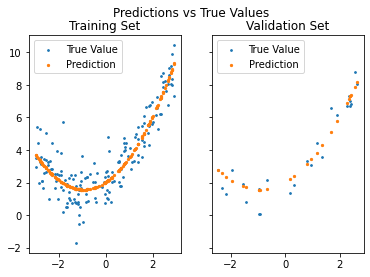

In [67]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
g=w1 * x_tr + w2 * (x_tr**2) + b

g_val = w1 * x_val + w2 * (x_val**2) + b

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

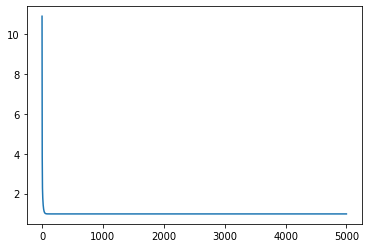

In [68]:
plt.plot(errors)